In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from numpy import genfromtxt
from sklearn.metrics import mean_squared_error

In [2]:
train_data = pd.read_csv('datasets/train_dataset.csv', delimiter=',')
test_data = pd.read_csv('datasets/test_dataset.csv', delimiter=',')

train_data.head()

,periodo,clase_caida_ocupante,clase_incendio,clase_otro,clase_volcamiento,clase_choque,clase_atropello,festivo,plan_exodo,plan_retorno,...,mes_10,mes_11,mes_12,dia_semana_1,dia_semana_2,dia_semana_3,dia_semana_4,dia_semana_5,dia_semana_6,dia_semana_7
0,2014,7,0,18,1,35,13,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2014,7,0,9,1,43,12,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2014,5,0,13,1,67,7,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2014,7,0,9,1,40,11,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,5,0,10,3,43,6,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
train_data.columns

Index(['periodo', 'clase_caida_ocupante', 'clase_incendio', 'clase_otro',
       'clase_volcamiento', 'clase_choque', 'clase_atropello', 'festivo',
       'plan_exodo', 'plan_retorno', 'mes_01', 'mes_02', 'mes_03', 'mes_04',
       'mes_05', 'mes_06', 'mes_07', 'mes_08', 'mes_09', 'mes_10', 'mes_11',
       'mes_12', 'dia_semana_1', 'dia_semana_2', 'dia_semana_3',
       'dia_semana_4', 'dia_semana_5', 'dia_semana_6', 'dia_semana_7'],
      dtype='object')

# Train data and Test Data

I will use as train dataset the summarized data for years 2014 to 2017. The data for year 2018 will be used as test dataset to train and fit our model.


In [4]:
X_train = train_data[['festivo','plan_exodo', 'plan_retorno', 'mes_01', 'mes_02', 'mes_03', 'mes_04', 'mes_05',
                      'mes_06', 'mes_07', 'mes_08', 'mes_09', 'mes_10', 'mes_11', 'mes_12', 'dia_semana_1',
                      'dia_semana_2', 'dia_semana_3', 'dia_semana_4', 'dia_semana_5', 'dia_semana_6', 'dia_semana_7']]
X_test = test_data[['festivo','plan_exodo', 'plan_retorno', 'mes_01', 'mes_02', 'mes_03', 'mes_04', 'mes_05',
                      'mes_06', 'mes_07', 'mes_08', 'mes_09', 'mes_10', 'mes_11', 'mes_12', 'dia_semana_1',
                      'dia_semana_2', 'dia_semana_3', 'dia_semana_4', 'dia_semana_5', 'dia_semana_6', 'dia_semana_7']]

y_train = train_data[['clase_caida_ocupante', 'clase_incendio', 'clase_otro', 'clase_volcamiento',
                       'clase_choque', 'clase_atropello']]

y_test = test_data[['clase_caida_ocupante', 'clase_incendio', 'clase_otro', 'clase_volcamiento',
                       'clase_choque', 'clase_atropello']]

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

## Hyperparameter tuning

We will use cross-validation to tune the typical forest regressor parameters:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

A nice reference to do this can be found at https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74, we will add to the features the log2 type and will use less estimators by now.

In [5]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
max_features = ['log2', 'auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'estimator__n_estimators': n_estimators,
               'estimator__max_features': max_features,
               'estimator__max_depth': max_depth,
               'estimator__min_samples_split': min_samples_split,
               'estimator__min_samples_leaf': min_samples_leaf}

In [6]:
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf_random = RandomizedSearchCV(estimator = regr_multirf,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1)

In [7]:
# fits model
regr_multirf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                                                  criterion='mse',
                                                                                  max_depth=[10,
                                                                                             20,
                                                                                             30,
                                                                                             40,
                                                                                             50,
                                                                                             60,
                                                                                             70,
                                                                  

In [8]:
# Gets the best settings
best_random = regr_multirf_random.best_estimator_

In [9]:
# Predict on new data
y_multirf_random = best_random.predict(X_test)

### Mean square error
Now, let's extract the mean squared error

In [10]:
mean_squared_error(y_test, y_multirf_random, multioutput='raw_values')

array([1.56904920e+01, 1.94692094e-02, 2.14984574e+01, 5.31722644e+00,
       1.54026380e+02, 1.37360572e+01])

The category 'clase_incendio' is overfitted due to the lowest error, and thus, our model will not be able to predict with a good accuracy this one. Let's see a little beat what is going on with that particular class

In [11]:
mean_incendio = train_data[['clase_incendio']].mean()
std_incendio = train_data[['clase_incendio']].std()
number_of_accidents = train_data[['clase_incendio']].sum()

print(f'mean: {mean_incendio[0]} -- std: {std_incendio[0]} -- historical num of accidents: {number_of_accidents[0]}')

mean: 0.01163586584531143 -- std: 0.10727697566244408 -- historical num of accidents: 17


We can notice that the std is too low, this make us to think that this type of accident is not usual and probably not related with the other variables.

Taking a look to the number of accidents of this class from 2014 to 2017, there has been just 17!, a very low number compared with the other kind of accidents. We must notice also, that there is a type of accident labeled as 'otro' that may hide accidents where fire was presented, so I have decided to merge these two columns.

In [12]:
train_data['clase_otro'] = train_data['clase_incendio'] + train_data['clase_otro']

test_data['clase_otro'] = train_data['clase_incendio'] + train_data['clase_otro']

In [24]:
# Trains the model again
x_columns = ['festivo','plan_exodo', 'plan_retorno', 'mes_01', 'mes_02', 'mes_03', 'mes_04', 'mes_05',
             'mes_06', 'mes_07', 'mes_08', 'mes_09', 'mes_10', 'mes_11', 'mes_12', 'dia_semana_1',
             'dia_semana_2', 'dia_semana_3', 'dia_semana_4', 'dia_semana_5', 'dia_semana_6', 'dia_semana_7']
y_columns = ['clase_caida_ocupante', 'clase_otro', 'clase_volcamiento', 'clase_choque', 'clase_atropello']


X_train = train_data[x_columns]
X_test = test_data[x_columns]

y_train = train_data[y_columns]

y_test = test_data[y_columns]

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

In [13]:
# fits both models
regr_multirf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                                                  criterion='mse',
                                                                                  max_depth=[10,
                                                                                             20,
                                                                                             30,
                                                                                             40,
                                                                                             50,
                                                                                             60,
                                                                                             70,
                                                                  

In [42]:
# Gets the best settings
best_random = regr_multirf_random.best_estimator_

# Predict on new data
y_predict = best_random.predict(X_test)

# Series
y_test_series = pd.DataFrame(y_test, columns=y_columns)
y_predict_series = pd.DataFrame(y_predict, columns=y_columns)
y_test_series.head()

,clase_caida_ocupante,clase_otro,clase_volcamiento,clase_choque,clase_atropello
0,7,18,1,36,8
1,11,9,6,63,8
2,4,13,4,73,14
3,12,9,2,58,8
4,11,10,1,41,10


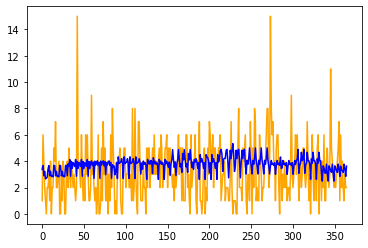

In [81]:
plt.plot(y_test_series['clase_volcamiento'], color="orange")
plt.plot(y_predict_series['clase_volcamiento'], color="blue")


**Predicted and Test Graph** There is a very high error, this seems to be related with the assumption of multiple outputs instead of a single one. Let's train an individual model to see if there is an improvement

In [55]:
# Trains the model again
x_columns = ['festivo','plan_exodo', 'plan_retorno', 'mes_01', 'mes_02', 'mes_03', 'mes_04', 'mes_05',
             'mes_06', 'mes_07', 'mes_08', 'mes_09', 'mes_10', 'mes_11', 'mes_12', 'dia_semana_1',
             'dia_semana_2', 'dia_semana_3', 'dia_semana_4', 'dia_semana_5', 'dia_semana_6', 'dia_semana_7']
y_columns = ['clase_choque']


X_train = train_data[x_columns]
X_test = test_data[x_columns]

y_train = train_data['clase_choque']

y_test = test_data['clase_choque']

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

In [56]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [58]:
y_predict = rf.predict(X_test)

In [61]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [64]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 9.5248 degrees.
Accuracy = 86.31%.
Model Performance
Average Error: 9.2440 degrees.
Accuracy = 86.55%.
Improvement of 0.28%.


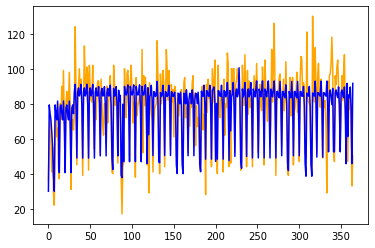

In [83]:
plt.plot(y_test, color="orange")
plt.plot(best_random.predict(X_test), color="blue")

There is an improvement, but the model seems to be still losing something. Probably, to have only binary values as predictors is affectings its accuracy. Let's train the rest of individual models

In [95]:
# Trains the model again
x_columns = ['festivo','plan_exodo', 'plan_retorno', 'mes_01', 'mes_02', 'mes_03', 'mes_04', 'mes_05',
             'mes_06', 'mes_07', 'mes_08', 'mes_09', 'mes_10', 'mes_11', 'mes_12', 'dia_semana_1',
             'dia_semana_2', 'dia_semana_3', 'dia_semana_4', 'dia_semana_5', 'dia_semana_6', 'dia_semana_7']
y_columns = ['clase_caida_ocupante', 'clase_otro', 'clase_volcamiento', 'clase_choque', 'clase_atropello']


X_train = train_data[x_columns]
X_test = test_data[x_columns]
models = {}
for y_column in y_columns:
    print()
    y_train = train_data[y_column]
    y_test = test_data[y_column]

    rf = RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    rf_random.fit(X_train.to_numpy(), y_train.to_numpy())
    best_random = rf_random.best_estimator_
    models[y_column] = best_random
    



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished


In [103]:
# Saves the models
from sklearn.externals import joblib
for (key, model) in models.items():
    joblib.dump(model, f'predictor_{key}.sk')